In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating environment at `C:\D Drive\Courses\Non Umich Courses\CMU\Optimal_Control_16_745\Lectures and Codes\Lecture 5\Project.toml`


In [2]:
using LinearAlgebra
using ForwardDiff
using PyPlot

In [3]:
Q = Diagonal([0.5; 1])
function f(x)
    return 0.5*(x-[1; 0])'*Q*(x-[1; 0])
end
function ∇f(x)
    return Q*(x-[1; 0])
end
function ∇2f(x)
    return Q
end

∇2f (generic function with 1 method)

In [4]:
A = [1.0 -1.0]
b = -1.0
function c(x)
    return dot(A,x) - b
end
function ∂c(x)
    return A
end

∂c (generic function with 1 method)

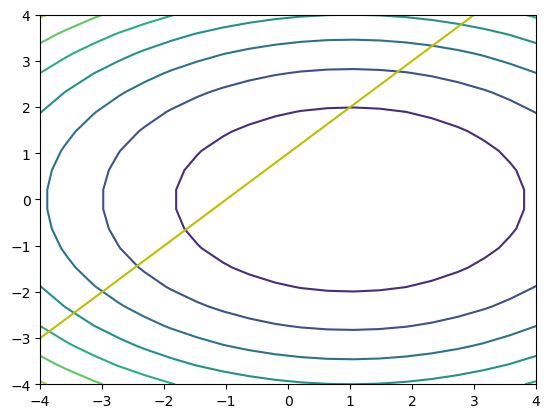

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000638A8130>

In [6]:
function plot_landscape()
    Nsamp = 20
    Xsamp = kron(ones(Nsamp),LinRange(-4,4,Nsamp)')
    Ysamp = kron(ones(Nsamp)',LinRange(-4,4,Nsamp))
    Zsamp = zeros(Nsamp,Nsamp)
    for j = 1:Nsamp
        for k = 1:Nsamp
            Zsamp[j,k] = f([Xsamp[j,k]; Ysamp[j,k]])
        end
    end
    contour(Xsamp,Ysamp,Zsamp)

    xc = LinRange(-4,3,Nsamp)
    plot(xc,xc.+1,"y")
end

plot_landscape()

In [7]:
function La(x,λ,ρ)
    p = max(0,c(x))
    return f(x) + λ*p + (ρ/2)*(p'*p)
end

La (generic function with 1 method)

In [8]:
function newton_solve(x0,λ,ρ)
    x = x0
    p = max.(0,c(x))
    C = zeros(1,2)
    if c(x) ≥ 0
        C = ∂c(x)
    end
    g = ∇f(x) + (λ+ρ*p)*C'
    while norm(g) ≥ 1e-8
        H = ∇2f(x) + ρ*C'*C
        Δx = -H\g
        
        x = x+Δx
        
        p = max.(0,c(x))
        C = zeros(1,2)
        if c(x) ≥ 0
            C = ∂c(x)
        end
        g = ∇f(x) + (λ+ρ*p)*C'
    end
    
    return x
end

newton_solve (generic function with 1 method)

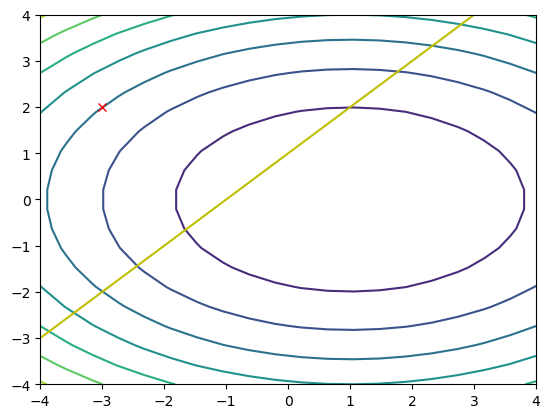

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000066495DC0>

In [26]:
xguess = [-3; 2]
λguess = [0.0]
ρ = 1.0
plot_landscape()
plot(xguess[1], xguess[2], "rx")

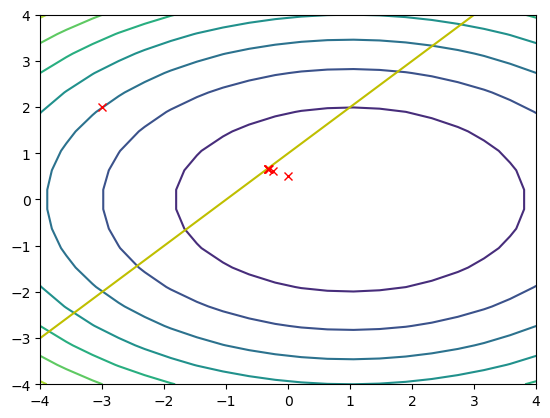

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000063ED5460>

In [32]:
xnew = newton_solve(xguess[:,end],λguess[end],ρ)
λnew = max.(0,λguess[end]+ρ*c(xnew))
xguess = [xguess xnew]
λguess = [λguess λnew]
# ρ = 10*ρ
plot_landscape()
plot(xguess[1,:], xguess[2,:], "rx")